In [1]:
from files.utils.constants import *
from files.utils.utility_functions import *
from files.models.neural_models import *

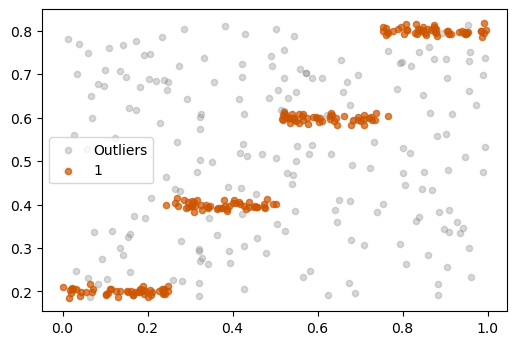

In [4]:
ds, gt = load_dataset_by_name(base_path="/home/catonz/Neural-PreferenceIsolation/", name="stair4")
plot_clusters(gt, ds)
x = np.linspace(np.min(ds[:,0]), np.max(ds[:,1]), len(ds))

In [5]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(ds[:,0],ds[:,1])

In [8]:
model = AEModel(n_first_hidden=16)
model.fit(ds, epochs=100, print_training=False)
preds = model.predict(ds)

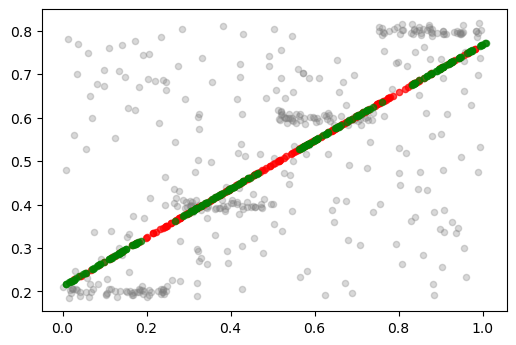

In [10]:
plot(ds, c='gray', alpha=0.3, new_fig=True, dpi=100)
plot(preds[~(gt==1)], c='r')
plot(preds[gt==1], c='g')

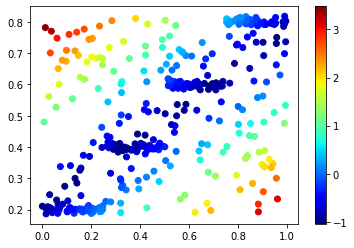

In [12]:
scores = np.linalg.norm(ds - preds, axis=1)
scores = (scores - np.mean(scores)) / np.std(scores)
plt.scatter(ds[:,0], ds[:,1], c=scores, cmap="jet")
plt.colorbar()

In [15]:
p_m, p_q, *_ = stats.linregress(preds[:,0], preds[:,1])
p_m, p_q

(0.6711857196208868, 0.18001251821983977)

In [16]:
for n, v in model.named_parameters():
    print(n, v.tolist())

layers.0.weight [[-0.6782990097999573, -0.25279271602630615], [0.4952041208744049, 0.0432734377682209], [-0.7209873795509338, -1.0521879196166992], [0.562853217124939, 0.3422805070877075], [-0.2755271792411804, 0.772955060005188], [-0.5038691163063049, 1.0341628789901733], [-0.8261299133300781, 0.017580531537532806], [-0.20422284305095673, -0.15146903693675995], [-0.9970273971557617, 0.6204955577850342], [0.12295828014612198, 0.6912795901298523], [-0.4802047610282898, 0.08938516676425934], [-0.2702189087867737, -0.6895022988319397], [1.002535343170166, -0.26188552379608154], [0.3924470841884613, 0.5607044100761414], [-0.7620486617088318, -0.4343457520008087], [0.20302508771419525, 0.6904937028884888]]
layers.0.bias [0.6262078881263733, -0.25379422307014465, -1.001901626586914, -0.5391055345535278, -0.4851383864879608, -0.36369788646698, 0.28401896357536316, -0.5276105999946594, 0.04804748669266701, -0.852810263633728, -0.2446930855512619, 0.4403957426548004, -0.2885567843914032, -0.512

In [17]:
w1, w2 = model.layers[1].weight.detach().numpy()
w2 / w1

ValueError: too many values to unpack (expected 2)

In [ ]:
- np.mean((preds[:,1]*w1 + preds[:,0]*w2)/w1)

-0.8344553

In [ ]:
b0 = model.layers[0].bias
b1, b2 = model.layers[1].bias
b0 / torch.abs(b1 / b2)

tensor([0.0832], grad_fn=<DivBackward0>)

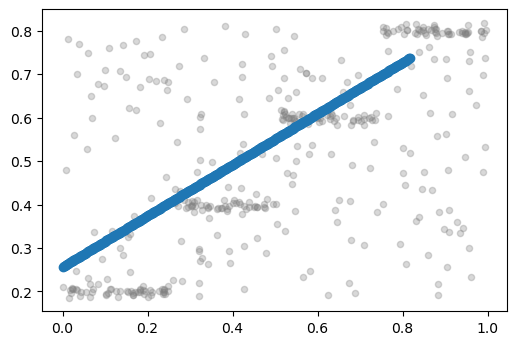

In [ ]:
plot(ds, c='gray', alpha=0.3, new_fig=True, dpi=100)
plt.scatter(x, p_m*x+p_q)

In [ ]:
from files.models.base_models import LineEstimator

line = LineEstimator()
line.slope = p_m
line.intercept = p_q
residuals_line = line.get_residuals(ds)

In [ ]:
residuals_ae = model.get_residuals(ds)


In [ ]:
print(np.min(residuals_ae), np.max(residuals_ae))
print(np.min(residuals_line), np.max(residuals_line))

0.007820804681733268 0.5073244772177169
5.439004264885476e-05 0.5067653262563732


In [ ]:
np.max(residuals_ae - residuals_line)

0.00961394588484691

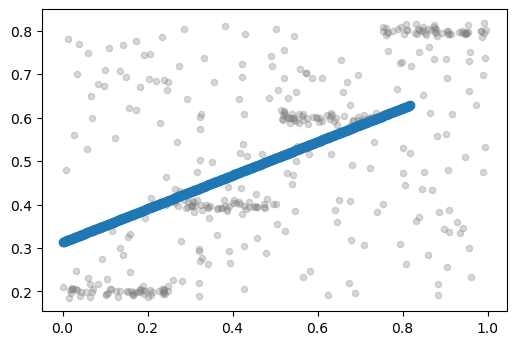

In [ ]:
plot(ds, new_fig=True, c='gray', alpha=0.3, dpi=100)
plt.scatter(x, x*slope+intercept)


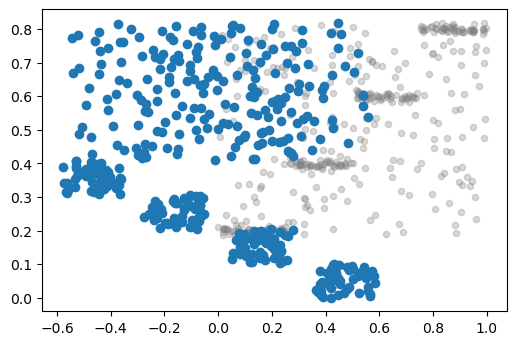

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1).fit(ds)
new_ds = pca.transform(ds)
plot(ds, c='gray', alpha=0.3, new_fig=True, dpi=100)
plt.scatter(new_ds, x)